In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [69]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

# Aula 4

Olá cientista!

Seja bem vindo e bem vinda à aula 04!

Na aula passada, exploramos a relação e a correlação entre nossas variáveis. 
Estudamos a função ```crosstab```, gráfico de dispersão, linha de tendência, correlação entre variáveis e mapa de calor. Puxa, foi muita coisa!

Você conseguiur resolver os desafios que o Guilherme, o Thiago e a Vanessa deixaram pra vocês? Esperamos que sim porque hoje, vamos mergulhar na nossa penúltima aula!

A primeira coisa que vamos fazer para essa aula é abrir a nossa outra base de dados. Para baixá-la vamos acessar o github para copiarmos o link do arquivo. No repositório nós temos dois arquivos: os dados_experimentos.zip e o dados_arquivos.csv. Nós vamos agora trabalhar com os dados_arquivos.csv.

Vamos clicar com o botão esquerdo; assim que ele abrir, vamos clicar na opção "View raw" com o botão direito, e selecionar a opção "copiar endereço do link".

Vamos importar o pandas(caso você não tenha importado ainda) para nos ajudar a ler essa base de dados, através do seguinte código:

In [70]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Repare que ele já mostra pra gente o número de colunas: 207. Ou seja, é um dataset bem extenso.

Vamos começar a analisar as colunas. A primeria coluna tem o nome de "id", o que nos remete a um identificador. Além disso, as seguintes colunas possuem nomes bem complexos. Não são nomes muito descritivos para quem não é da área.

Com a ajuda da Vanessa, descobrimos que esses nomes remetem aos mecanismos de ação das drogas. Ou seja, esses dados nos trazem a relação do mecanismo de ação do alvo (enzima, proteína, etc) com a droga utilizada. Ela também explicou sobre os termos "agonista" e "antiagonista", que ativam o receptor e o bloqueiam, respectivamente.

Nesse ponto a Vanessa nos explica numa apresentação como funciona a ligação do spike com o receptor e todo o procedimento de infecção nas nossas células.

Agora já sabemos que cada coluna do nosso dataframe representa um mecanismo de ação. Olhando para nosso cabeçalho percebemos que temos praticamente todos os dados com o valor 0. Será que todos os dados da tabela tem esse valor? Vamos investigar!

In [71]:
dados_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1], dtype=int64)

Olha só! Nosso resultado foi um array entre 0 e 1. Se você quiser fazer um teste com todos os outros mecanismos de ação também encontrará o resultado entre 0 e 1. Mas por que isso acontece?

Cada linha é o resultado do experimento da outra base de dados dos experimentos que trabalhamos. Quando um determinado mecanismo de ação é ativado ele é indicado como 1. Quando esse mecanismo de ação não é ativado ele é detectado como 0.

Portanto, todo resultado que obtivermos o número 1, saberemos que ele foi ativado.

Vamos fazer uma investigação agora que pode ser muito interessante para o cientista que está trabalhando nesse projeto: qual foi o mecanismo de ação que foi mais ativado?

Vamos então fazer a soma das colunas, para saber qual vai ser o que apresenta mais o número 1. Mas antes vamos verificar se todas as minhas colunas possuem somente números ou se possuem strings também nelas, através desse código:

In [72]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


Vimos que uma delas apresenta como resultado 1 objeto. Ou seja, não conseguiremos aplicar a função soma de forma direta.

Vamos então fazer essa soma excluindo a coluna id, que possui dados diferentes de números em sua composição, da seguinte maneira:

In [73]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Legal. No resultado há uma informação que nos chama a atenção: os inibidores, no topo do nosso resultado, são os que possuem maior quantidade de resultados positivos. Seria um ponto a se investigar.

Então aqui vamos ter o nosso primeiro desafio da aula 4. Lembrando que todos os desafios estão no final desse notebook da aula.



Nós fizemos uma contagem para saber onde o mecanismo de ação obteve mais respostas; agora vamos fazer outros testes.

Vamos verificar se a linha específica que vamos escolher foi ativada em algum momento. E, se ela foi ativada, quantas vezes isso ocorreu?

Utilizaremos o seguinte código:

In [74]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

E aqui temos o nosso resultado. Na primeira linha tivemos uma única ativação. Já na segunda não obtivemos nenhuma. Na terceira tivemos 3, e assim por diante. Nesse que tivemos a resposta como 0, precisaríamos saber se foi um controle, ou se realmente a droga não ativou nenhuma resposta.

Aqui embaixo temos os nossos dados dos resultados:


In [75]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


E aqui temos a nossa base de dados:

In [76]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Na base de dados resultados não temos a informação que queremos, referente ao tratamento. Nós só temos a coluna tratamento na base de dados inteira.

No tratamento só temos a coluna id, e os mecanismos de ação que foram ativados por aquela coluna. Então, agora, precisamos de alguma maneira, mesclar essas informações.

Antes de fazer esse passo, de mesclar, vamos criar duas novas colunas na base de dados resultado. Vamos criar uma primeira coluna que vamos chamar de n_moa(número de moas ativos), que é justamente o que havíamos calculado anteriormente, dessa maneira:

In [77]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

 Vamos então verificar se a coluna apresenta resultados diferentes de 0; se for diferente de 0 ela retorna a mensagem 'true'; se for igual a 0 retorna 'false':

In [78]:
dados_resultados['n_moa'] != 0

0         True
1        False
2         True
3        False
4         True
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: n_moa, Length: 23814, dtype: bool

Ok, então o código para criarmos e visualizarmos as duas colunas é esse:

In [79]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


Para visualizarmos basta ir até as duas últimas colunas que elas estarão lá.

Agora que temos as duas colunas que queremos, vamos mesclar, ou então "mergear", as informações que queremos.

Para isso vamos utilizar o merge do pandas, através desse código:

In [80]:
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Maravilha! Conseguimos agora a junção dos nossos dados de resultados com os dados de experimentos. Agora conseguimos responder a pergunta que fizemos anteriormente. No tratamento eu ativei algum moa?

Para fazer isso vamos utilizar o método:

In [81]:
dados_combinados.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

E obtivemos todas as respostas com o 'false'. Isso quer dizer que com controle não tivemos nenhuma resposta de algum mecanismo de ação.

Agora, será que algum tratamento que o paciente recebeu (com_droga, nesse caso) teve alguma substância que não ativou o mecanismo de ação? Vamos responder isso com a seguinte alteração no código anterior:

In [82]:
dados_combinados.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

Olha só, tivemos um resultado interessante. Vemos que 14447 tiveram mecanismos de ação, e aproximadamente 7500 não foram ativados. 

Vamos fazer uma análise utilizando agora o boxplot, que gera uma imagem onde podemos identificar a mediana(linha central) e os quartis, entendendo assim como está a distribuição dos dados; dessa maneira vamos identificar, de forma visual, a comparação de categoria dos dados. Para isso vamos utilizar os seguintes códigos:

<AxesSubplot:xlabel='droga', ylabel='g-0'>

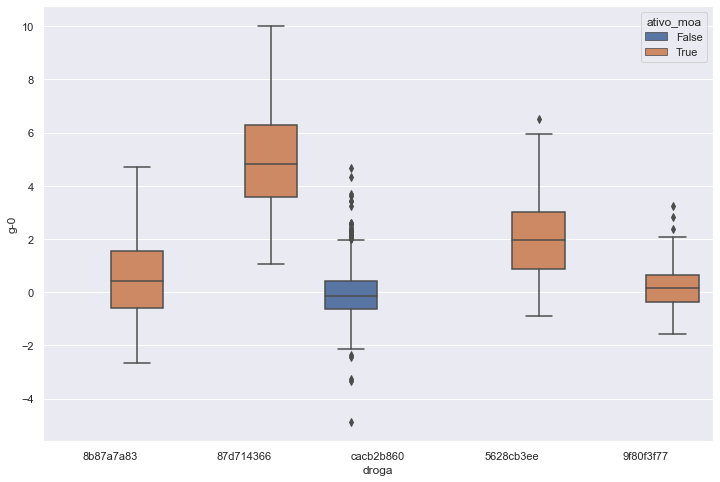

In [83]:
composto_principal = dados_combinados['droga'].value_counts().index[:5]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('droga in @composto_principal'), y= 'g-0', x='droga', hue='ativo_moa')


Analisando os boxplots, percebemos que temos algumas categorias com a mediana próxima de 0; temos outra com a mediana próxima de 5 e a outra próxima de 2.

É curioso observarmos também que o 3º boxplot, da esquerda para a direita, está bem concentrado; esse composto específico é na verdade o composto que nos indica que foi "com tratamento".

Outro ponto interessante é que o último boxplot tem um comportamento muito semelhante ao 3º; provavelmente a droga não modificou tanto assim o gene 0.

Agora é com você! Faça os desafios e nos encontramos na próxima aula.

### Desafio 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)

In [84]:
dados_analise = dados_resultados.drop(['id', 'n_moa', 'ativo_moa'], axis=1).sum().sort_values(ascending=False).reset_index()
dados_analise.columns = ['MOA', 'Contagem']
dados_analise

,MOA,Contagem
0,nfkb_inhibitor,832
1,proteasome_inhibitor,726
2,cyclooxygenase_inhibitor,435
3,dopamine_receptor_antagonist,424
4,serotonin_receptor_antagonist,404
...,...,...
201,protein_phosphatase_inhibitor,6
202,autotaxin_inhibitor,6
203,diuretic,6
204,erbb2_inhibitor,1


In [85]:
lista = []
for i in dados_analise['MOA']:
    if len(i.split('_')[-1]) > 1:
        lista.append(i.split('_')[-1])
    else:
        lista.append(i)

In [86]:
dados_analise['Ação'] = lista
dados_analise.head()

,MOA,Contagem,Ação
0,nfkb_inhibitor,832,inhibitor
1,proteasome_inhibitor,726,inhibitor
2,cyclooxygenase_inhibitor,435,inhibitor
3,dopamine_receptor_antagonist,424,antagonist
4,serotonin_receptor_antagonist,404,antagonist


In [87]:
top10 = dados_analise.groupby('Ação').agg({'Contagem': 'sum'}).sort_values('Contagem', ascending=False).reset_index()
top10.head(10)

,Ação,Contagem
0,inhibitor,9693
1,antagonist,3449
2,agonist,2330
3,blocker,323
4,agent,150
5,activator,115
6,local,80
7,antioxidant,73
8,immunosuppressant,73
9,anti-inflammatory,73


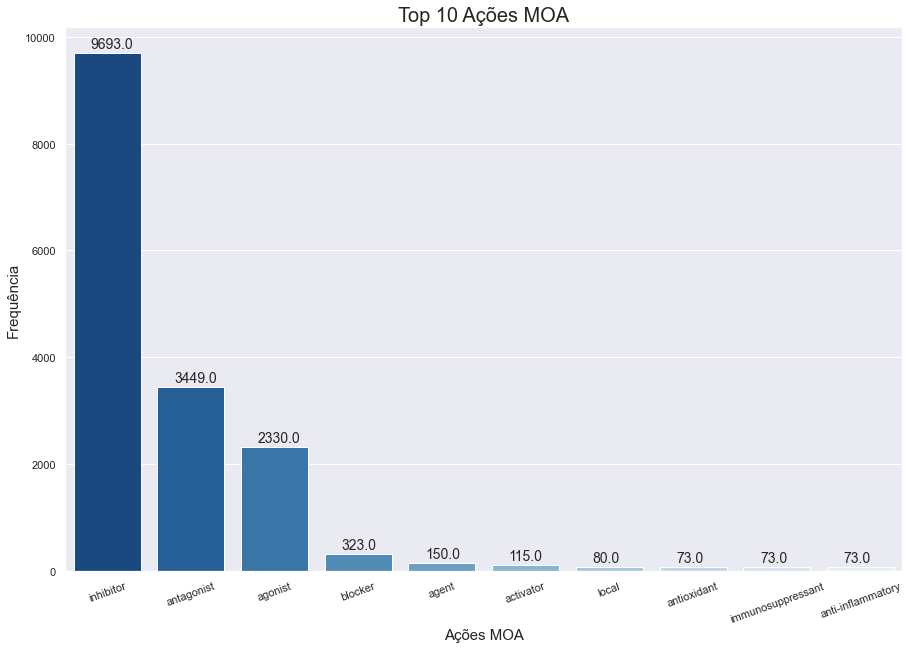

In [88]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Ação', y='Contagem', data=top10.head(10), palette='Blues_r')
ax.set_title('Top 10 Ações MOA', fontsize=20)
ax.set_xlabel('Ações MOA', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)
plt.xticks(rotation=20)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()), (i.get_x()+0.20, i.get_height()+90), fontsize=14)
    
plt.show()

### Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle

Para esse desafio, usaremos uma condicional, se ```dataset[COLUNA DESEJADA]``` for igual a ```com_controle```, ela retornará o valor ```True``` ou ```False```.

In [89]:
dados_combinados['eh_controle'] = dados_combinados['tratamento'] == 'com_controle'

In [90]:
dados_combinados[dados_combinados['tratamento'] == 'com_controle'].head(1)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.223,-0.6226,-0.722,...,0.3562,1.329,0.5573,0.8837,0.5534,0.8976,1.005,0,False,True


In [91]:
dados_combinados[dados_combinados['tratamento'] == 'com_droga'].head(1)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.062,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False


### Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72

Para essa tarefa, nao há a necessidade de criarmos diretamente 3 colunas manuais, basta utilizarmos a função ```.get_dummies()``` que a biblioteca pandas nos oferece.

In [92]:
dados_combinados1 = pd.get_dummies(dados_combinados, columns=['tempo'])

In [94]:
dados_combinados1.head()

,id,tratamento,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,...,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle,tempo_24,tempo_48,tempo_72
0,id_000644bb2,com_droga,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,-0.3981,0.2139,0.3801,0.4176,1,True,False,1,0,0
1,id_000779bfc,com_droga,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0.1522,0.1241,0.6077,0.7371,0,False,False,0,0,1
2,id_000a6266a,com_droga,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,0,1,0
3,id_0015fd391,com_droga,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,0,1,0
4,id_001626bd3,com_droga,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.1094,0.2885,-0.3786,0.7125,1,True,False,0,0,1


### Desafio 04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)

In [95]:
dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False


In [96]:
dados_combinados['droga'].value_counts(ascending=False).head(5)

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
Name: droga, dtype: int64

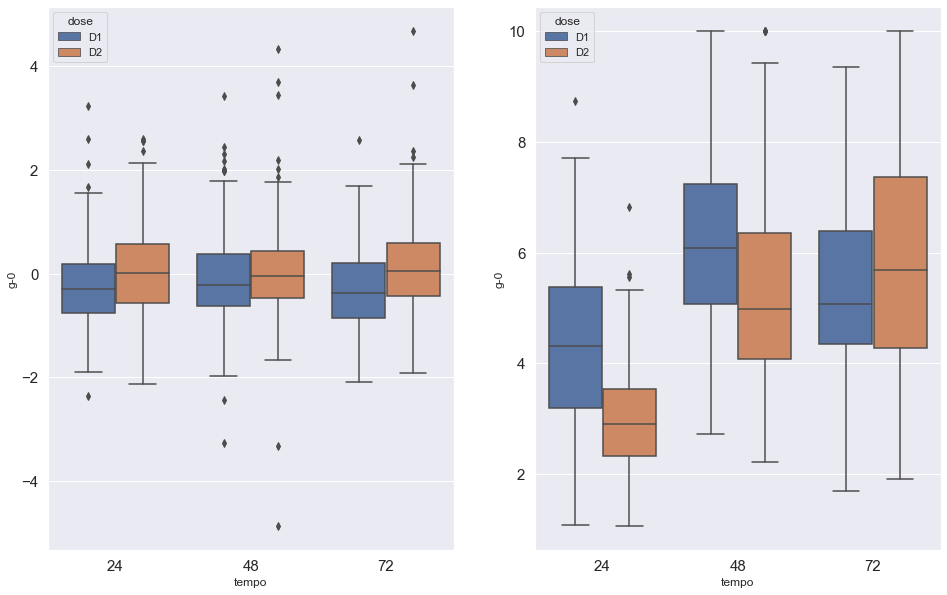

In [97]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
sns.boxplot(x='tempo', y='g-0', data=dados_combinados[dados_combinados['droga'] == 'cacb2b860'], hue='dose')

plt.subplot(1,2,2)
sns.boxplot(x='tempo', y='g-0', data=dados_combinados[dados_combinados['droga'] == '87d714366'], hue='dose')

plt.show()

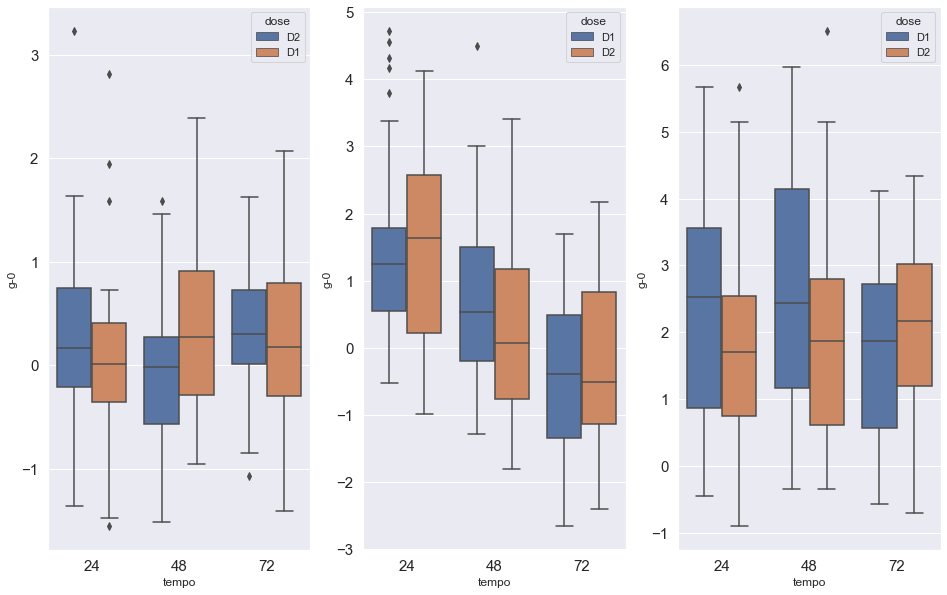

In [98]:
plt.figure(figsize=(16,10))

plt.subplot(1,3,1)
sns.boxplot(x='tempo', y='g-0', data=dados_combinados[dados_combinados['droga'] == '9f80f3f77'], hue='dose')

plt.subplot(1,3,2)
sns.boxplot(x='tempo', y='g-0', data=dados_combinados[dados_combinados['droga'] == '8b87a7a83'], hue='dose')

plt.subplot(1,3,3)
sns.boxplot(x='tempo', y='g-0', data=dados_combinados[dados_combinados['droga'] == '5628cb3ee'], hue='dose')

plt.show()

### Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA 

Vamos investigar os compostos, que não são de controle, que tiveram ativação de moa.

In [117]:
cinco_principais_compostos = dados_combinados['droga'].value_counts()[:5].index.to_list()
cinco_principais_compostos

['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee']

In [119]:
# 1° Composto com maior frequência, ativação do MOA
dados_combinados.query('droga == @cinco_principais_compostos[0] and ativo_moa')

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle


In [121]:
# 2° composto com maior frequência, ativação do MOA:
dados_combinados.query('droga == @cinco_principais_compostos[1] and ativo_moa')

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle
16,id_002fb9c19,com_droga,48,D1,87d714366,8.738,0.1914,2.4380,-0.2930,3.2010,...,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-6.784,2,True,False
76,id_00cf039a7,com_droga,48,D2,87d714366,4.546,0.4257,0.7670,2.1950,2.5960,...,-9.538,-10.000,-8.520,-10.000,-7.436,-6.918,-5.235,2,True,False
119,id_01534c4ee,com_droga,72,D2,87d714366,10.000,-1.2200,1.5150,-2.1910,4.3530,...,-10.000,-10.000,-9.054,-10.000,-8.771,-9.694,-5.548,2,True,False
209,id_0236e3425,com_droga,72,D1,87d714366,3.612,-1.7130,0.0313,-1.7360,3.3550,...,-10.000,-10.000,-8.695,-10.000,-8.559,-8.025,-6.642,2,True,False
218,id_024a52260,com_droga,24,D2,87d714366,2.119,0.1098,1.1040,5.0620,-0.7427,...,-9.679,-8.439,-2.047,-7.430,-5.861,-4.591,-3.533,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23680,id_fe8abffe0,com_droga,72,D1,87d714366,6.649,-0.4462,1.7370,0.0553,3.0330,...,-9.910,-9.910,-9.910,-9.910,-8.830,-9.910,-7.807,2,True,False
23727,id_ff1d43f96,com_droga,24,D2,87d714366,3.263,1.4620,0.2311,3.3590,1.7250,...,-10.000,-7.359,-1.574,-6.896,-5.001,-4.139,-3.271,2,True,False
23776,id_ff9d0a022,com_droga,24,D2,87d714366,1.227,0.3781,2.8860,7.1470,-0.4875,...,-10.000,-8.754,-1.938,-7.529,-6.318,-5.701,-3.561,2,True,False
23791,id_ffd1fd119,com_droga,72,D2,87d714366,5.312,0.4505,1.5320,0.8226,3.0250,...,-9.373,-9.966,-9.362,-9.966,-8.642,-9.966,-4.605,2,True,False


In [123]:
# 3° composto com maior frequência, ativação do MOA:
dados_combinados.query('droga == @cinco_principais_compostos[2] and ativo_moa')

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle
75,id_00ceee87f,com_droga,24,D2,9f80f3f77,0.1529,0.7548,-0.2295,-0.8523,-0.2514,...,0.4769,1.0690,0.8160,0.1111,-0.5638,-0.2188,-0.7164,1,True,False
251,id_02945c933,com_droga,48,D1,9f80f3f77,2.3910,-0.0442,-0.0665,0.1629,-0.8641,...,-1.6310,1.5310,-0.3261,1.0790,0.7368,-1.1260,0.4094,1,True,False
337,id_03a148573,com_droga,48,D2,9f80f3f77,-0.7600,-0.8886,1.4640,5.7940,2.1050,...,-1.7550,1.2800,-0.6403,0.6950,0.2307,-0.3977,0.4826,1,True,False
355,id_03d57c47a,com_droga,24,D1,9f80f3f77,0.0525,1.2830,-0.3548,0.0921,0.6543,...,0.2871,1.2800,-0.0711,0.1970,1.0190,-0.1827,-0.9308,1,True,False
404,id_04495c8c8,com_droga,24,D1,9f80f3f77,0.0237,-0.7693,-0.2666,0.0654,-1.2950,...,0.4614,-0.3478,-0.4587,0.7526,-0.6175,-0.3348,-0.4039,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23400,id_fb9af8d4b,com_droga,24,D2,9f80f3f77,-0.2336,-1.4430,1.3380,-0.7720,0.2987,...,-0.2586,-0.6534,0.0568,-0.5375,-0.4933,0.3711,-2.0240,1,True,False
23604,id_fd9b2b44a,com_droga,72,D2,9f80f3f77,-0.4287,-0.9049,0.2150,0.9100,0.0290,...,0.5703,0.2625,0.1868,0.0963,0.4610,2.1100,0.9392,1,True,False
23675,id_fe7394162,com_droga,24,D1,9f80f3f77,0.6920,-1.0130,0.7749,0.9089,-0.9861,...,-1.1990,-1.1180,0.6894,-0.0847,-0.8220,-0.6637,1.0120,1,True,False
23762,id_ff78a40f0,com_droga,24,D1,9f80f3f77,0.7240,1.1790,-0.4856,-0.9352,0.2317,...,0.1129,-0.0407,0.0308,0.3508,-0.3640,0.3919,0.9206,1,True,False


### Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

In [125]:
# 1° Composto com maior frequência, avaliação de ativação n_moa
dados_combinados.query('droga == @cinco_principais_compostos[0] and n_moa > 1')

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle


In [126]:
# 2° Composto com maior frequência, avaliação de ativação n_moa
dados_combinados.query('droga == @cinco_principais_compostos[1] and n_moa > 1')

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle
16,id_002fb9c19,com_droga,48,D1,87d714366,8.738,0.1914,2.4380,-0.2930,3.2010,...,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-6.784,2,True,False
76,id_00cf039a7,com_droga,48,D2,87d714366,4.546,0.4257,0.7670,2.1950,2.5960,...,-9.538,-10.000,-8.520,-10.000,-7.436,-6.918,-5.235,2,True,False
119,id_01534c4ee,com_droga,72,D2,87d714366,10.000,-1.2200,1.5150,-2.1910,4.3530,...,-10.000,-10.000,-9.054,-10.000,-8.771,-9.694,-5.548,2,True,False
209,id_0236e3425,com_droga,72,D1,87d714366,3.612,-1.7130,0.0313,-1.7360,3.3550,...,-10.000,-10.000,-8.695,-10.000,-8.559,-8.025,-6.642,2,True,False
218,id_024a52260,com_droga,24,D2,87d714366,2.119,0.1098,1.1040,5.0620,-0.7427,...,-9.679,-8.439,-2.047,-7.430,-5.861,-4.591,-3.533,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23680,id_fe8abffe0,com_droga,72,D1,87d714366,6.649,-0.4462,1.7370,0.0553,3.0330,...,-9.910,-9.910,-9.910,-9.910,-8.830,-9.910,-7.807,2,True,False
23727,id_ff1d43f96,com_droga,24,D2,87d714366,3.263,1.4620,0.2311,3.3590,1.7250,...,-10.000,-7.359,-1.574,-6.896,-5.001,-4.139,-3.271,2,True,False
23776,id_ff9d0a022,com_droga,24,D2,87d714366,1.227,0.3781,2.8860,7.1470,-0.4875,...,-10.000,-8.754,-1.938,-7.529,-6.318,-5.701,-3.561,2,True,False
23791,id_ffd1fd119,com_droga,72,D2,87d714366,5.312,0.4505,1.5320,0.8226,3.0250,...,-9.373,-9.966,-9.362,-9.966,-8.642,-9.966,-4.605,2,True,False


In [127]:
# 3° Composto com maior frequência, avaliação de ativação n_moa
dados_combinados.query('droga == @cinco_principais_compostos[2] and n_moa > 1')

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle


### Desafio 08: Resumo do que você aprendeu com os dados

Nesta aula foi possível aprender mais sobre as funções que a biblioteca ```pandas``` nos oferece.
Conseguimos unificar dataset diferentes, e isso foi possível pois em ambos os dataset, temos chaves primárias, com essa chave primaria é possivel realizar a mesclagem.

Relizamos também um procedimento chamado ```Feature Engineering```, termo utilizado para quando necessitamos extrair mais dados de um dataset bruno para realizar uma aná mais completa.

<p>Fatiar os dados por termos nas colunas;</a>
<p>Criar novas colunas com valores calculados;</a>
<p>Avançamos nos conhecimentos do boxplot;</a>
<p>Obter maior frequência dos resultados;</a>
<p>Aprofundamento no conhecimento do merge e combinação de bases;</a>
<p>Aprofundamento na avaliação dos dados em correlações simples.</a>